In [ ]:
!pip install pandas


**Step 1: Explore Data**

**Dataset yang digunakan adalah data hasil crawling dari schoology, yang setiap datanya sudah terdapat column rate dari 1-5.**

In [ ]:
# lakukan load dataset terlebih dahulu
import pandas as pd
review = pd.read_csv("drive/My Drive/reviews.csv")
review.head()

,Name,Date,Comment,Star
0,John Adlan,16-02-2020,Tidak ada audio pada dari video atau audio men...,1.0
1,Muhammad Fadli,21-02-2020,update baru yang begitu mengerikan. Setiap kal...,2.0
2,Melia Medina,24-02-2020,Sejak update terakhir dalam desain. dibutuhkan...,4.0
3,Jacob Ploesch,09-03-2020,Beberapa crash akhir akhir ini desain malas Ba...,1.0
4,I Got Jams,03-03-2020,Mengapa saya tidak bisa login ?? Ia mengatakan...,1.0


In [ ]:
# coba kita perhatikan berapa banyak data yang kita dapatkan
review.describe()

,Star
count,3195.000000
mean,3.012520
std,1.738681
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [ ]:
# coba kita lihat salah satu hasil review
review["Comment"][1]

'update baru yang begitu mengerikan. Setiap kali saya ingin membuka link baru tidak bekerja. Schoology bisa tolong memperbaiki masalah ini. Aplikasi ISTN bekerja sangat baik sekali. Terima kasih loading lama kuota habis'

In [ ]:
# coba kita lihat berapa banyak jumlah data untuk tiap rate
review["Star"].value_counts()

5.0    1134
1.0    1131
3.0     334
4.0     315
2.0     281
Name: Star, dtype: int64

In [ ]:
# coba kita lihat user unik yang ada
review["Name"].value_counts()[:10]

A Google user                                                                                                                                                            267
Pengguna Google                                                                                                                                                           81
Biju Chacko                                                                                                                                                                2
crazy                                                                                                                                                                      2
Suman Devi                                                                                                                                                                 2
Lone Wolf                                                                                                                              

In [ ]:
# coba kita lihat user unik yang ada
review["Date"].value_counts()[:10]

13-03-2020    45
12-03-2020    20
10-03-2020    17
25-09-2019    14
16-09-2019    12
30-01-2020    12
19-10-2018    11
12-09-2019    11
01-10-2019    10
11-03-2020    10
Name: Date, dtype: int64

In [ ]:
# coba kita lihat user dengan nama Iwan Setiawan, komentar apa yang dia kemukakan
review[review["Name"] == "Suman Devi"]

,Name,Date,Comment,Star
331,Suman Devi,14-05-2019,Ini tidak menerima email atau sandi bahkan kem...,1.0
462,Suman Devi,04-07-2019,selalu mengatakan email atau kata sandi tidak ...,1.0


**Step 2: Preprocessing**

**Pada tahap ini tujuannya adalah mengubah dataset supaya dapat diolah pada algoritma Machine Learning.**


**Label Encoding**

**Pertama, kita akan mengubah menjadi 2 sentiment dulu, yaitu 'positif' dan 'negatif'.**

**- Untuk sentiment positif, adalah data dengan rate 5, menjadi label 1**
**- Untuk sentiment negatif, adalah data dengan rate 1-4, menjadi label 0**



In [ ]:
!pip install matplotlib

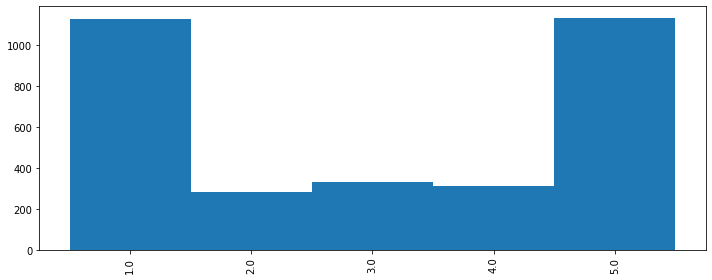

In [ ]:
# kita lihat dulu distribusi label
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(10,4))

stars_histogram = review["Star"].value_counts().sort_index()

stars_histogram.plot(kind="bar", width=1.0)
plt.tight_layout()
plt.show()

In [ ]:
# mengubah rate
label = []
for index, row in review.iterrows():
    if row["Star"] == 5:
        label.append(1)
    else:
        label.append(0)

review["label"] = label
review = review.drop(columns=['Star'])
review.tail()

,Name,Date,Comment,label
3305,Fadhil Umar,07-01-2020,mantap mantap,1
3306,Mi Nggri,09-03-2017,baik dan bermanfaat,1
3307,Niken Ayu,18-09-2019,👍,0
3308,dylan marvin tan,02-03-2016,Bruuuuuhhhhhh.....................,1
3309,Annisa AyuNandri,12-09-2015,bagus,1


In [ ]:
review.head()

,Name,Date,Comment,label
0,John Adlan,16-02-2020,Tidak ada audio pada dari video atau audio men...,0
1,Muhammad Fadli,21-02-2020,update baru yang begitu mengerikan. Setiap kal...,0
2,Melia Medina,24-02-2020,Sejak update terakhir dalam desain. dibutuhkan...,0
3,Jacob Ploesch,09-03-2020,Beberapa crash akhir akhir ini desain malas Ba...,0
4,I Got Jams,03-03-2020,Mengapa saya tidak bisa login ?? Ia mengatakan...,0


In [ ]:
# cek lagi data
review['label'].value_counts()

0    2176
1    1134
Name: label, dtype: int64

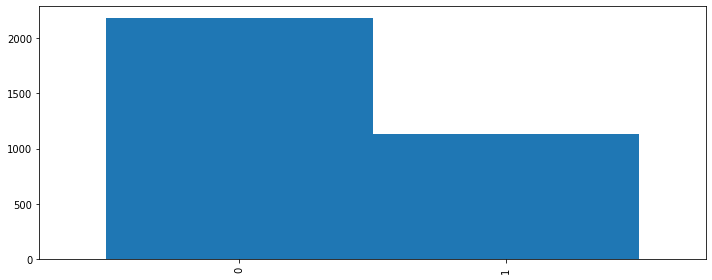

In [ ]:
# kita lihat lagi distribusi label
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(10,4))

stars_histogram = review["label"].value_counts().sort_index()

stars_histogram.plot(kind="bar", width=1.0)
plt.tight_layout()
plt.show()

**Drop Unused Column in Dataframe**

In [ ]:
df_preprocessed = review.copy()
df_preprocessed = df_preprocessed.drop(columns=['Date', 'Name'])
df_preprocessed.head()

,Comment,label
0,Tidak ada audio pada dari video atau audio men...,0
1,update baru yang begitu mengerikan. Setiap kal...,0
2,Sejak update terakhir dalam desain. dibutuhkan...,0
3,Beberapa crash akhir akhir ini desain malas Ba...,0
4,Mengapa saya tidak bisa login ?? Ia mengatakan...,0


**Balancing Dataset**

In [ ]:
# bootstrap
s_1 = df_preprocessed[df_preprocessed['label']==0].sample(1655,replace=True)
s_2 = df_preprocessed[df_preprocessed['label']==1].sample(1655,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['label'].value_counts(normalize=True))

(3310, 2)
1    0.5
0    0.5
Name: label, dtype: float64


In [ ]:
!pip install wordcloud

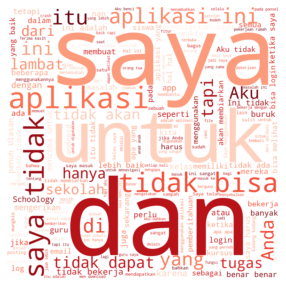

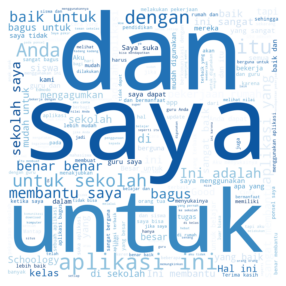

In [ ]:
# wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

# Polarity == 0 negative
negative = df_preprocessed[df_preprocessed["label"] == 0]
all_text_negative = ' '.join(str(word) for word in negative["Comment"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negative)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
positive = df_preprocessed[df_preprocessed["label"] == 1]
all_text_positive = ' '.join(str(word) for word in positive["Comment"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_positive)
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Cleansing Data**

**Hapus tanda baca, lower text, dll**


In [ ]:
import string, re

def cleansing(data):
    # lower text
    data = str(data).lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [ ]:
# jalankan cleansing data
review = []
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["Comment"]))
    
df_preprocessed["Comment"] = review
df_preprocessed.head()

,Comment,label
303,aplikasi ini adalah ide bagus untuk orang tua ...,0
1322,banyak fitur tidak datang di aplikasi mobile s...,0
44,situs yang mengerikan dan bahkan aplikasi lebi...,0
1767,user interface adalah ceroboh dua anak anak di...,0
2638,sangat kecewa saya tidak bisa login profil p...,0


**Menghapus Stopwords**

**Berikutnya, kita akan menghapus stopwords menggunakan library Sastrawi. Stopwords adalah kata-kata yang tidak memiliki makna.**


In [ ]:
!pip install sastrawi

In [ ]:
# import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Contoh
kalimat = 'Dengan Menggunakan Python dan Library Sastrawi saya dapat melakukan proses Stopword Removal'
stop = stopword.remove(kalimat)
print(stop)

Dengan Menggunakan Python Library Sastrawi dapat melakukan proses Stopword Removal


In [ ]:
# lakukan pada data kita

review = []
for index, row in df_preprocessed.iterrows():
    review.append(stopword.remove(row["Comment"]))
    
df_preprocessed["Comment"] = review
df_preprocessed.head()

,Comment,label
303,aplikasi ide bagus orang tua sedikit tantang m...,0
1322,banyak fitur datang aplikasi mobile minta tema...,0
44,situs keri bahkan aplikasi lebih keri i cant k...,0
1767,user interface ceroboh anak anak sekolah dapat...,0
2638,sangat kecewa login profil ubah foto pulih pas...,0


**MELAKUKAN STEMMING**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'aplikasi schoology sangat bagus dan bermanfaat'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

aplikasi schoology sangat bagus dan manfaat


In [ ]:
# implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
    review.append(stemmer.stem(row["Comment"]))
    
df_preprocessed["Comment"] = review
df_preprocessed.head()

,Comment,label
303,aplikasi ide bagus orang tua sedikit tantang m...,0
1322,banyak fitur datang aplikasi mobile minta tema...,0
44,situs keri bahkan aplikasi lebih keri i cant k...,0
1767,user interface ceroboh anak anak sekolah dapat...,0
2638,sangat kecewa login profil ubah foto pulih pas...,0


**SPLIT DATASETS**

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['Comment'], df_preprocessed['label'], 
                                                    test_size=0.1, stratify=df_preprocessed['label'], random_state=30)

**FEATURE EXTRACTION**

Feature extraction merupakan sebuah step untuk mentransformasi teks kedalam angka atau yang bisa disebut feature representation. Terdapat beragam teknik untuk merubah teks kedalam array, tapi pada dasarnya kata kata unik dalam corpus itu yang menjadi featurenya. Feature extraction yang umum digunakan dalam sklearn adalah Count Vectorizer dan TF-IDF.

Count Vectorizer ini mudahnya menghitung semua kejadian kata dalam satu dokumen sedangkan tf-idf memberikan bobot masing masing kata.


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [ ]:
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [ ]:
print(X)

  (0, 1)	0.4924888870251974
  (0, 4)	0.7715790094657221
  (0, 3)	0.40264193560603856
  (1, 0)	0.7715790094657221
  (1, 1)	0.4924888870251974
  (1, 3)	0.40264193560603856
  (2, 5)	0.7715790094657221
  (2, 1)	0.4924888870251974
  (2, 3)	0.40264193560603856
  (3, 2)	0.8865476297873808
  (3, 3)	0.46263733109032296


In [ ]:
# implementasi pada dokumen kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2979, 1955)
(331, 1955)


In [ ]:
print(X_train)

  (0, 876)	0.1897237254973543
  (0, 741)	0.1911314021513826
  (0, 155)	0.13142988571758873
  (0, 611)	0.2047886652040218
  (0, 1346)	0.21404701683737057
  (0, 608)	0.254509138675176
  (0, 816)	0.29972395660744283
  (0, 86)	0.4495859349111643
  (0, 1037)	0.2181969092941431
  (0, 44)	0.3731314298081547
  (0, 91)	0.08635202584513375
  (0, 162)	0.268063829669378
  (0, 934)	0.4467176383779556
  (1, 630)	1.0
  (2, 1056)	0.4812001690853966
  (2, 938)	0.4947253627917656
  (2, 1514)	0.674136096376287
  (2, 91)	0.2631230439267592
  (3, 745)	0.7071067811865476
  (3, 646)	0.7071067811865476
  (4, 998)	0.6542261407147821
  (4, 1648)	0.7562989863839843
  (5, 676)	0.38694254905820735
  (5, 92)	0.25581688787211443
  (5, 160)	0.2803097773708172
  :	:
  (2975, 962)	0.11424375918400462
  (2975, 155)	0.20666894387852539
  (2976, 784)	0.6918385708654198
  (2976, 1319)	0.4931865508471889
  (2976, 141)	0.21982381073850485
  (2976, 962)	0.3347984481777328
  (2976, 934)	0.34309460686016413
  (2977, 1540)	0.542

In [ ]:
print(X_test)

  (0, 135)	1.0
  (1, 1882)	0.5552538176549852
  (1, 1469)	0.3973859864304331
  (1, 862)	0.4137601083249752
  (1, 783)	0.44435385482228784
  (1, 141)	0.21662917415341593
  (1, 91)	0.1960725458931721
  (1, 44)	0.2824130979333869
  (2, 1327)	0.36602483213095954
  (2, 1271)	0.4467224714644194
  (2, 1019)	0.31000427151187915
  (2, 835)	0.1835249777870331
  (2, 612)	0.29551661756702136
  (2, 444)	0.35447599747213526
  (2, 401)	0.36929306706391773
  (2, 252)	0.2346386120176994
  (2, 250)	0.30516588020562885
  (2, 44)	0.19783483972753618
  (3, 1466)	0.39048451804712403
  (3, 773)	0.8484183675948128
  (3, 256)	0.3573627214655418
  (4, 1586)	0.23168232605051997
  (4, 1582)	0.49661104803375944
  (4, 1559)	0.2670404650613431
  (4, 1314)	0.20214419210549278
  :	:
  (329, 741)	0.1239768021312111
  (329, 726)	0.09882984350762035
  (329, 697)	0.18217298961844938
  (329, 623)	0.1947650871221039
  (329, 596)	0.16508657798223036
  (329, 582)	0.11476951436676659
  (329, 456)	0.20475999720117766
  (329, 36

In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**WRAPPING PREPROCESS**

In [ ]:
def preprocess_data(data):
    # cleansing data
    data = cleansing(data)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

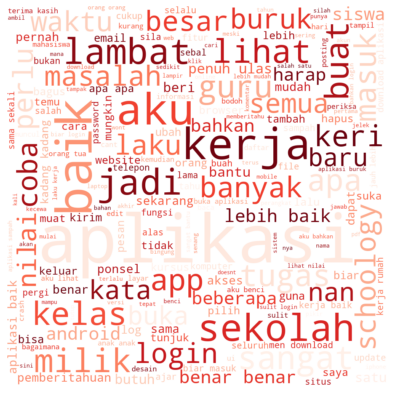

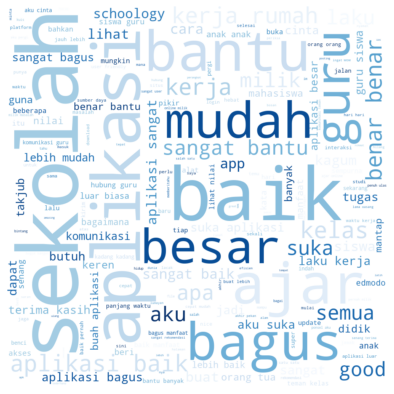

In [ ]:
# wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

# Polarity == 0 negative
negative = df_preprocessed[df_preprocessed["label"] == 0]
all_text_negative = ' '.join(str(word) for word in negative["Comment"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negative)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
positive = df_preprocessed[df_preprocessed["label"] == 1]
all_text_positive = ' '.join(str(word) for word in positive["Comment"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_positive)
plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**TRAINING**

Pada algoritma Machine Learning yang digunakan adalah Naive Bayes Classifier.

Naive Bayes classifier merupakan sebuh metode klasifikasi dengan probabilitas sederhana yang mengaplikasikan teorema Bayes dengan tidak ketergantungan (independen) yang tinggi.Model klasifikasi naive Bayes menghitung probabilitas posterior suatu kelas, berdasarkan pada distribusi kata-kata dalam dokumen. Klasifikasi naive Bayes dibangun oleh data pelatihan untuk memperkirakan probabilitas dari setiap kategori yang terdapat pada ciri dokumen yang diuji. Sistem akan dilatih dengan menggunakan data baru (data latih dan data uji) dan selanjutnya diberi tugas untuk menebak nilai fungsi target dari data tersebut.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()

cross_val_score(clf, X_train, y_train, cv=10)

array([0.89597315, 0.90604027, 0.89261745, 0.83892617, 0.86577181,
       0.87248322, 0.83557047, 0.87919463, 0.8590604 , 0.87205387])

In [ ]:
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
# lakukan prediksi pada data test
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [ ]:
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [ ]:
# f1_score
f1_score(y_test, predict)

0.9129129129129129

In [ ]:
# accuracy score
accuracy_score(y_test, predict)

0.9123867069486404

In [ ]:
# precision score
precision_score(y_test, predict)

0.9101796407185628

In [ ]:
# recall score
recall_score(y_test, predict)

0.9156626506024096

In [ ]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

(150, 15, 14, 152)

In [ ]:
review_positif = "baik"
review_negatif = "lambat"

In [ ]:
clf.predict(preprocess_data(review_positif))

array([1])

In [ ]:
clf.predict(preprocess_data(review_negatif))

array([0])